# Homework 3, Part 1: Multiclass Classification

In this homework, we will implement a one-vs-all logistic regression classifier to recognize hand-written digits. There are more than 2 discrete values (namely, 10), so therefore this is a multiclass classification problem. One-vs-all is the technique taught to solve a problem set up like this.

For part 1, use:
* x3.m (Octave/MATLAB script that steps you through part 1)
* ex3data1.mat (Training set of hand-written digits)
* lrCostFunction.m (Logistic regression cost function)
* oneVsAll.m (Train a one-vs-all multi-class classifier)
* predictOneVsAll.m (Predict using a one-vs-all multi-class classifier

## Import Dataset

The dataset is in a .mat format, which is Matlab's native matrix format. We can use the scipy.io module's loadmat function to load .mat files as numpy nd-arrays.

In [1]:
from scipy.io import loadmat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

raw_data = loadmat("ex3data1.mat")

print("Some properties of ex3data1.mat:")
print(type(raw_data))
print(raw_data.keys())

Some properties of ex3data1.mat:
<class 'dict'>
dict_keys(['X', '__version__', '__header__', 'y', '__globals__'])


It looks like the dictionary has an X and a y key, which, by the looks of the dictionarys, are numpy ndarrays. We can set these to our own variables.

In [2]:
# Looking at X
print("Taking a look at X matrix: \n{}\n".format(raw_data["X"]))

# What does a sample of X look like?
print("Shape of a sample (example) of X: \n{} --> 20 x 20 image of digit, flattened to 400x1\n"\
      .format(raw_data["X"][50, :].shape))

# What is the total size of the training set? 5000 samples x 400 features (pixels) == 20000
print("Total size of training set: {}".format(raw_data["X"].size))

X = raw_data["X"]

Taking a look at X matrix: 
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]

Shape of a sample (example) of X: 
(400,) --> 20 x 20 image of digit, flattened to 400x1

Total size of training set: 2000000


In [3]:
# Looking at Y
print("Look at y: {}\n".format(raw_data["y"]))

# Shape of y
print("Shape of y: {}".format(raw_data["y"].shape))

y = raw_data["y"]

Look at y: [[10]
 [10]
 [10]
 ..., 
 [ 9]
 [ 9]
 [ 9]]

Shape of y: (5000, 1)


## Visualizing the Dataset

Visualizing two samples, reshaping 400x1 to 20x20, viz using plt.imshow()


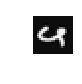

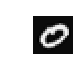

In [4]:
print("Visualizing two samples, reshaping 400x1 to 20x20, viz using plt.imshow()")

single_sample = np.expand_dims(X[1324], axis=0)
single_sample = single_sample.reshape((20, 20))

another_sample = np.expand_dims(X[321], axis=0)
another_sample = another_sample.reshape((20, 20))

plt.figure(figsize = (0.5,0.5))
plt.gray()
plt.imshow(single_sample, interpolation='nearest')
plt.axis("off")
plt.show()

plt.figure(figsize = (0.5,0.5))
plt.imshow(another_sample, interpolation='nearest')
plt.axis("off")
plt.show()

## Sigmoid, Cost Function, and Gradient

Sigmoid: Classic implementation of a vectorized sigmoid function.

Cost Function: This is the standard cost function -- it takes in whatever parameters you wish to process, the X array from which a np.dot() operation will give you your predictions, and the y array to compare against. The cost function in logistic is different from linear regression in the sense that it uses log to judge our predictions after they are transformed by the sigmoid function. Since the sigmoid function returns 0.0 <= x <= 1.0, we know that an application of log will result in 0 if our prediction is 1, and will result in 0 if we subtract 1 from what the logarithm outputs when our actual prediction is 0. It is also regularized due to the 400 parameters per example.

Gradient: To use advanced optimization methods, we have to provide a streamlined way for the API of that module to calculate the derivative(s) of the cost function w.r.t each parameter. We provide the gradients for any set of parameters you want to observe, and also it is regularized because of the high feature count (same way GD is regularized when it changes each parameter).

In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [71]:
# Defining a regularized cost function to use for an advanced optimization method -- note y is an array
def cost_function(parameters, X, y, reg_parameter):
    # Part 1: Calculating cost
    y_vector = y.ravel()
    positive_class = -1 * np.multiply(y, np.log(sigmoid(np.dot(X, parameters.T))))
    negative_class = np.multiply((1 - y), np.log(1 - sigmoid(np.dot(X, parameters.T))))
    
    # Regularization inner term excludes Theta0
    inner_reg_term = np.power(parameters[1:], 2)
    reg_term = np.sum(inner_reg_term) * (reg_parameter / (2 * len(X)))
    total_cost = (np.sum(positive_class - negative_class) / len(X)) + reg_term
    
    return total_cost

In [33]:
def gradient(parameters, X, y, reg_parameter):
    pred_act_diff = sigmoid(np.dot(X, parameters.T)) - y
    
    gradient = ((1 / len(X)) * np.sum(X * pred_act_diff.T, axis=0))
    gradient[1:] = gradient[1:] + ((reg_parameter / len(X)) * parameters[1:])
    
    return gradient

In [74]:
# Testing our cost_function
theta_t = np.array([-2.0, -1.0, 1, 2.0])
example_array = np.array([[0.1, 0.6, 1.1], [0.2, 0.7, 1.2], [0.3, 0.8, 1.3], [0.4, 0.9, 1.4], [0.5, 1.0, 1.5]])
X_t = np.append(np.ones((5, 1)), example_array, axis=1)
y_t = np.array([[1., 0., 1., 0., 1.]])
lambda_t = 3
print("Expected cost: 2.534819\nActual cost: {}\n".format(cost_function(theta_t, X_t, y_t, lambda_t)))
print("Expected values: 0.146561, -0.548558, 0.724722, 1.398003\nActual values: {}".format(\
                                                        gradient(theta_t, X_t, y_t, lambda_t)))

Expected cost: 2.534819
Actual cost: 2.534819396109744

Expected values: 0.146561, -0.548558, 0.724722, 1.398003
Actual values: [ 0.14656137 -0.54855841  0.72472227  1.39800296]


## Advanced Optimization Method

Here, we utilize scipy.optimize module's minimize function. This function takes in the fun=cost_function, x0=parameters, args=(X_mod, y_mod, lambda_var), method="TNC", jac=gradient. With the gradient and cost_function armed, the advanced optimization method is able to iteratively come up with a new set of transformed parameters with the graduent and then after judge them with the cost_function until it has reached a point where it is completed. 

### Note: Idea of using scipy.optimize was discovered in https://github.com/jdwittenauer/ipython-notebooks/blob/master/notebooks/ml/ML-Exercise3.ipynb

In [157]:
from scipy.optimize import minimize

# NOTE: "0" is labeled 10
def one_vs_all(X, y, num_labels, lambda_var):
    # scipy.optimize is not aware that our dataset does NOT contain 1's --> add the intercept column
    X_mod = np.append(np.ones((len(X),1)), X, axis=1)
    
    parameter_count = X_mod.shape[1]
    classifier_parameters = np.zeros((num_labels, parameter_count))
    
    for i in range(1, num_labels + 1):
        y_mod = np.expand_dims(np.array([ 1 if label == i else 0 for label in y]), axis=1).T
        parameters = np.zeros(X_mod.shape[1])
        
        result = minimize(fun=cost_function, x0=parameters, args=(X_mod, y_mod, lambda_var), method="TNC", jac=gradient)
        
        # Otherwise, element 0 would be empty -- inspiration taken form jdwittaneur, all other work is my own.
        classifier_parameters[i-1, :] = result.x
        
    return classifier_parameters

In [158]:
result = one_vs_all(X, y, 10, 1)
result_shape = result.shape

In [159]:
def predict_all(X, y, result):
    X_mod = np.append(np.ones((len(X), 1)), X, axis=1)

    predictions = sigmoid(np.dot(X_mod, result.T))
    prediction_list = np.array([np.argmax(transformed_datapoint) + 1 for transformed_datapoint in predictions])
    prediction_list = np.expand_dims(prediction_list, axis=1)
    
    accuracy = np.mean(prediction_list == y)
    
    return accuracy

In [160]:
print("Classifier accuracy: {:.2f}%".format(predict_all(X, y, result) * 100))

Classifier accuracy: 94.46%
